In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mth
import numpy as np

In [2]:
class FuzzySet:  
    def __init__(self, *args):
        self.fuzzy_set = set()
        for item, grade in args:
            if grade >= 0  and grade <= 1:
                self.fuzzy_set.add((item, grade))
            else:
                raise TypeError('\'grade\' value is not in [0; 1].')
    
    def __str__(self):
        return str(self.fuzzy_set)
    
    def add(self, item, grade):
        '''
        Adds a pair (item, grade) to f-set.
        '''
        if grade >= 0  and grade <= 1:
            if self.get_universum() is None or item not in self.get_universum():
                self.fuzzy_set.add((item, grade))
            else:
                buffer_dict = self.get_dict()
                self.fuzzy_set.remove((item, buffer_dict[item]))
                self.fuzzy_set.add((item, grade))
        else:
            raise TypeError('\'grade\' value is not in [0; 1].')
    
    def get_height(self):
        '''
        Returns the max grade in the f-set.
        '''
        max_grade = 0
        for i in self.fuzzy_set:
            if i[1] > max_grade:
                max_grade = i[1]
        return max_grade
    
    def get_universum(self):
        '''
        Returns set which contains every item from f-set.
        '''
        universum = set()
        for i in self.fuzzy_set:
            universum.add(i[0])
        if universum:
            return universum
        return None

    def get_support(self):
        '''
        Returns set which contains items with grade > 0.
        '''
        support = set()
        for i in self.fuzzy_set:
            if i[1] > 0:
                support.add(i[0])
        if support:
            return support
        return None
    
    def get_points(self):
        '''
        Returns list if items which have grade == 0.5.
        '''
        points = list()
        for i in self.fuzzy_set:
            if i[1] == 0.5:
                points.append(i[0])
        if points:
            return points
        return None
    
    def get_modal(self):
        '''
        Returns True if there is only 1 item has grade == 1. 
        Else returns False.
        '''
        max_gr = self.get_height()
        if not max_gr < 1:
            count = 0
            for i in self.fuzzy_set:
                if i[1] == max_gr:
                    count = count + 1
            if count == 1:
                return True
        return False
    
    def get_normal_subnormal(self):
        '''
        Returns True if there are some elements which have grade == 1.
        Else returns False
        '''
        max_gr = self.get_height()
        if max_gr == 1:
            return True #is normal
        else:
            return False #is subnormal    
    
    def get_core(self):
        '''
        Returns set of item with grade == 1.
        '''
        max_gr = self.get_height()
        if not max_gr != 1:
            result = set()
            for i in self.fuzzy_set:
                if i[1] == max_gr:
                    result.add(i[0])
            return result
        return None
            
    def get_borders(self):
        '''
        Returns set of items with 0 < grade < 1.
        '''
        result = set()
        for i in self.fuzzy_set:
            if i[1] > 0 and i[1] < 1:
                result.add(i[0])
        if result:
            return result
        return None
    
    def get_normal_set(self):
        '''
        Returns normolized set.
        '''
        if not self.get_normal_subnormal():
            result = set()
            max_gr = self.get_height()
            for i in self.fuzzy_set:
                result.add((i[0], round(i[1]/max_gr, 2)))       
            return result
        return None
    
    def get_level_set(self, level):
        '''
        Returns set which is slice of items with grade >= level.
        '''
        result = set()
        for i in self.fuzzy_set:
            if i[1] >= level:
                result.add(i[0])
        if result:
            return result
        return None
    
    def get_dict(self):
        '''
        Returns dict like {item_1 : grade_1, item_2 : grade_2, ...}.
        '''
        result = {}
        for i in self.fuzzy_set:
            result[i[0]] = i[1]
        if result:
            return result
        return None
    
    def get_nearest_set(self):
        '''
        Returns nearest f-set (with same items but grades == 0 or 1 only).
        '''
        result = FuzzySet()
        items = self.get_universum()
        x_grades = self.get_dict()
        for i in items:
            result.add(i, x_grades[i] >= 0.5 and 1 or 0)
        return result
    
    def get_coordinates(self):
        '''
        Returns tuple like (list of items, list of their grades).
        '''
        items = list(self.get_universum())
        items.sort()
        
        grades = list()
        grades_dict = self.get_dict()
        for i in items:
            grades.append(grades_dict.get(i))
            
        return (items, grades)
    
    def __add__(self, other):
        result = FuzzySet()
        
        self_dict = self.get_dict()
        other_dict = other.get_dict()
        
        new_dict = {}
        
        for i in self.get_universum():
            for j in other.get_universum():
                rounded = round(i + j, 1)
                new_dict[rounded] = max(new_dict.get(rounded, 0), min(self_dict.get(i,1), other_dict.get(j,1)))
                result.add(rounded, new_dict[rounded])
            
        return result
    
    def __sub__(self, other):
        result = FuzzySet()
        
        self_dict = self.get_dict()
        other_dict = other.get_dict()
        
        new_dict = {}
        
        for i in self.get_universum():
            for j in other.get_universum():
                rounded = round(i - j, 1)
                new_dict[rounded] = max(new_dict.get(rounded, 0), min(self_dict.get(i,1), other_dict.get(j,1)))
                result.add(rounded, new_dict[rounded])
                
        return result
    
    def __mul__(self, other):
        result = FuzzySet()
        
        self_dict = self.get_dict()
        other_dict = other.get_dict()
        
        print('self:', self)
        print('other:', other)
        
        new_dict = {mth.trunc(i * j) : 0 for i in self.get_universum() for j in other.get_universum()}
        print(new_dict)
        
        for i in self.get_universum():
            for j in other.get_universum():
                rounded = mth.trunc(i * j)
                print('i:', i)
                print('j:', j)
                print('rounded:', rounded)
                print('new_dict[rounded]:', new_dict[rounded])
                print('self_dict.get(i, 1):', self_dict.get(i, 1))
                print('other_dict.get(j, 1):', other_dict.get(j, 1))
                print('min(self_dict.get(i, 1), other_dict.get(j, 1)):', min(self_dict.get(i, 1), other_dict.get(j, 1)))
                new_dict[rounded] = max(new_dict[rounded], min(self_dict[i], other_dict[j]))
                result.add(rounded, new_dict[rounded])
                
        return result
    
    def __truediv__(self, other):
        result = FuzzySet()
        
        self_dict = self.get_dict()
        other_dict = other.get_dict()
        
        new_dict = {}
        
        for i in self.get_universum():
            for j in other.get_universum():
                if j != 0:
                    rounded = round(i / j, 1)
                    new_dict[rounded] = max(new_dict.get(rounded, 0), min(self_dict.get(i,1), other_dict.get(j,1)))
                    result.add(rounded, new_dict[rounded])
                
        return result

In [3]:
class FuzzyInterval():
    def __init__(self, label = '', args = None, h = 0.1):
        '''
        Default h = 0.1
        '''
        self.h = h
        self.universum = []
        self.values = {}
        if label == 'triangle':
            (fst_0, max_1, snd_0) = args
            for i in np.linspace(fst_0, snd_0, (snd_0 - fst_0)/h):
                self.universum.append(i)
                if i >= fst_0 or i < max_1:
                    self.values[i] = 1/2 + mth.cos( (i - max_1) * mth.pi/(max_1 - fst_0) )/2
                else:
                    self.values[i] = 1/2 + mth.cos( (i - snd_0) * mth.pi/(snd_0 - max_1) )/2
        elif label == 'slide':
            (left, right, slide_type) = args
            
            if slide_type == 'left':
                for i in  np.linspace(left, right, (right - left)/h):
                    self.universum.append(i)
                    if i >= left or i <= right:
                        self.values[i] = 1/2 + mth.cos( (i - left) * mth.pi/(left - right) )/2
                    else:
                        self.values[i] = 1
            elif slide_type == 'right':
                for i in  np.linspace(left, right, (right - left)/h):
                    self.universum.append(i)
                    if i >= left or i <= right:
                        self.values[i] = 1/2 + mth.cos( (i - right) * mth.pi/(right - left) )/2
                    else:
                        self.values[i] = 1        
                        
    def __str__(self):
        return (str(self.values))
    
    #operators stolen from FuzzySet
    def __add__(self, other):
        result = FuzzyInterval()
        
        self_values = self.values
        other_values = other.values
        
        self_uni = self.universum
        other_uni = other.universum

        buffer_values = {}
        
        for i in self_uni:
            for j in other_uni:
                rounded = round(i + j, 1)
                buffer_values[rounded] = max(buffer_values.get(rounded, 0), 
                                             min(self_values.get(i, 1), other_values.get(j, 1)))
                result.add(rounded, buffer_values[rounded])
        
        return result
    
    def __sub__(self, other):
        result = FuzzyInterval()
        
        self_values = self.values
        other_values = other.values
        
        self_uni = self.universum
        other_uni = other.universum
        
        buffer_values = {}
        
        for i in self_uni:
            for j in other_uni:
                rounded = round(i - j, 2)
                buffer_values[rounded] = max(buffer_values.get(rounded, 0), 
                                             min(self_values.get(i, 1), other_values.get(j, 1)))
                result.add(rounded, buffer_values[rounded])
                
        return result
    
    def __mul__(self, other):
        result = FuzzyInterval()
        
        self_values = self.values
        other_values = other.values
        
        self_uni = self.universum
        other_uni = other.universum
        
        buffer_values = {}
        
        for i in self_uni:
            for j in other_uni:
                rounded = (mth.trunc(i * j) * 3)/3
                buffer_values[rounded] = max(buffer_values.get(rounded, 0), 
                                             min(self_values.get(i, 1), other_values.get(j, 1)))
                result.add(rounded, buffer_values[rounded])
                
        return result
        
    def __truediv__(self, other):
        result = FuzzyInterval()
        
        self_values = self.values
        other_values = other.values
        
        self_uni = self.universum
        other_uni = other.universum
        
        buffer_values = {}
        
        for i in self_uni:
            for j in other_uni:
                if j != 0:
                    rounded = round(i / j, 1)
                    buffer_values[rounded] = max(buffer_values.get(rounded, 0), 
                                                 min(self_values.get(i, 1), other_values.get(j, 1)))
                    result.add(rounded, buffer_values[rounded])
                 
        return result
    
    #original content
    def add(self, new_item, new_value):
        '''
        Adds pair (new_item, new_value). If there is item == new_item than new_value replaces old.
        '''
        if new_item in self.universum:
            self.values[new_item] = new_value
        else:
            self.universum.append(new_item)
            self.values[new_item] = new_value
    
    def crds(self):
        '''
        Returns tuple like (list of items, list of their grades).
        '''
        items = self.universum
        items.sort()
        
        grades = list()
        grades_dict = self.values
        for i in items:
            grades.append(grades_dict.get(i))
            
        return (items, grades)

In [4]:
class FuzzyNumber():
    def __init__(self, label, number = 0, n = 4, input_set = None, input_int = None):
        #more than
        #less than
        #around = triangle
        self.f_set = FuzzySet()
        if label == 'around':
            self.f_int  = FuzzyInterval('triangle', (number - n, number, number + n))
            numbers = range(number - n, number + n + 1)
            values = [i for i in numbers]
            
            for i in range( len(numbers)//2, len(numbers) ):
                values[i] = round(1/2 + mth.cos( (numbers[i] - (number - n)) * mth.pi/(number - n - (number + n)) )/2, 3)
                values[len(numbers) - i - 1] = values[i]
            values[len(numbers)//2] = 1
            
            for i in range(len(numbers)):
                      self.f_set.add(numbers[i], values[i])
                      
        elif label == 'more than':
            n *= 2
            self.f_int = FuzzyInterval('slide', (number, number + n, 'left'))
            numbers = range(number, number + n + 1)
            values = [i for i in numbers]
            
            for i in range(len(numbers)):
                values[i] = round(1/2 + mth.cos( (numbers[i] - number) * mth.pi/(number - (number + n)) )/2, 3)
            
            values[0] = 1
            for i in range(len(numbers)):
                      self.f_set.add(numbers[i], values[i])
                    
        elif label == 'less than':
            self.f_int = FuzzyInterval('slide', (number - n, number, 'right'))
            numbers = range(number - n, number + 1)
            values = [i for i in numbers]
            
            for i in range(len(numbers)):
                values[i] = round(1/2 + mth.cos( (numbers[i] - number - n) * mth.pi/(number - n - number) )/2, 3)
            
            values[0] = 1
            values.sort()
            for i in range(len(numbers)):
                      self.f_set.add(numbers[i], values[i])
        
        elif label == '':
            self.f_set = input_set
            self.f_int = input_int
    
    def __add__(self, other):
        return FuzzyNumber('', input_set = self.f_set + other.f_set, input_int = self.f_int + other.f_int)
    
    def __mul__(self, other):
        return FuzzyNumber('', input_set = self.f_set * other.f_set, input_int = self.f_int * other.f_int)
    
    def __sub__(self, other):
        return FuzzyNumber('', input_set = self.f_set - other.f_set, input_int = self.f_int - other.f_int)
    
    def __truediv__(self, other):
        return FuzzyNumber('', input_set = self.f_set / other.f_set, input_int = self.f_int / other.f_int)
    
    def crds(self):
        return (self.f_set.get_coordinates(), self.f_int.crds())
    
    def __repr__(self):
        return str(self.f_set)
            
    def __str__(self):
        return str(self.f_set)

# Задание 1.
Даны нечеткие числа $ a $ и $ b $. Выполнить аримфетические операции и сравнить нечеткие числа с дискретными носителями.
$$$$
$ a $ -- примерно 12. 
$$$$ 
$ b $ -- немного больше 10.  

In [5]:
A = FuzzyNumber('around', 12, 3)
B = FuzzyNumber('more than', 10, 3)

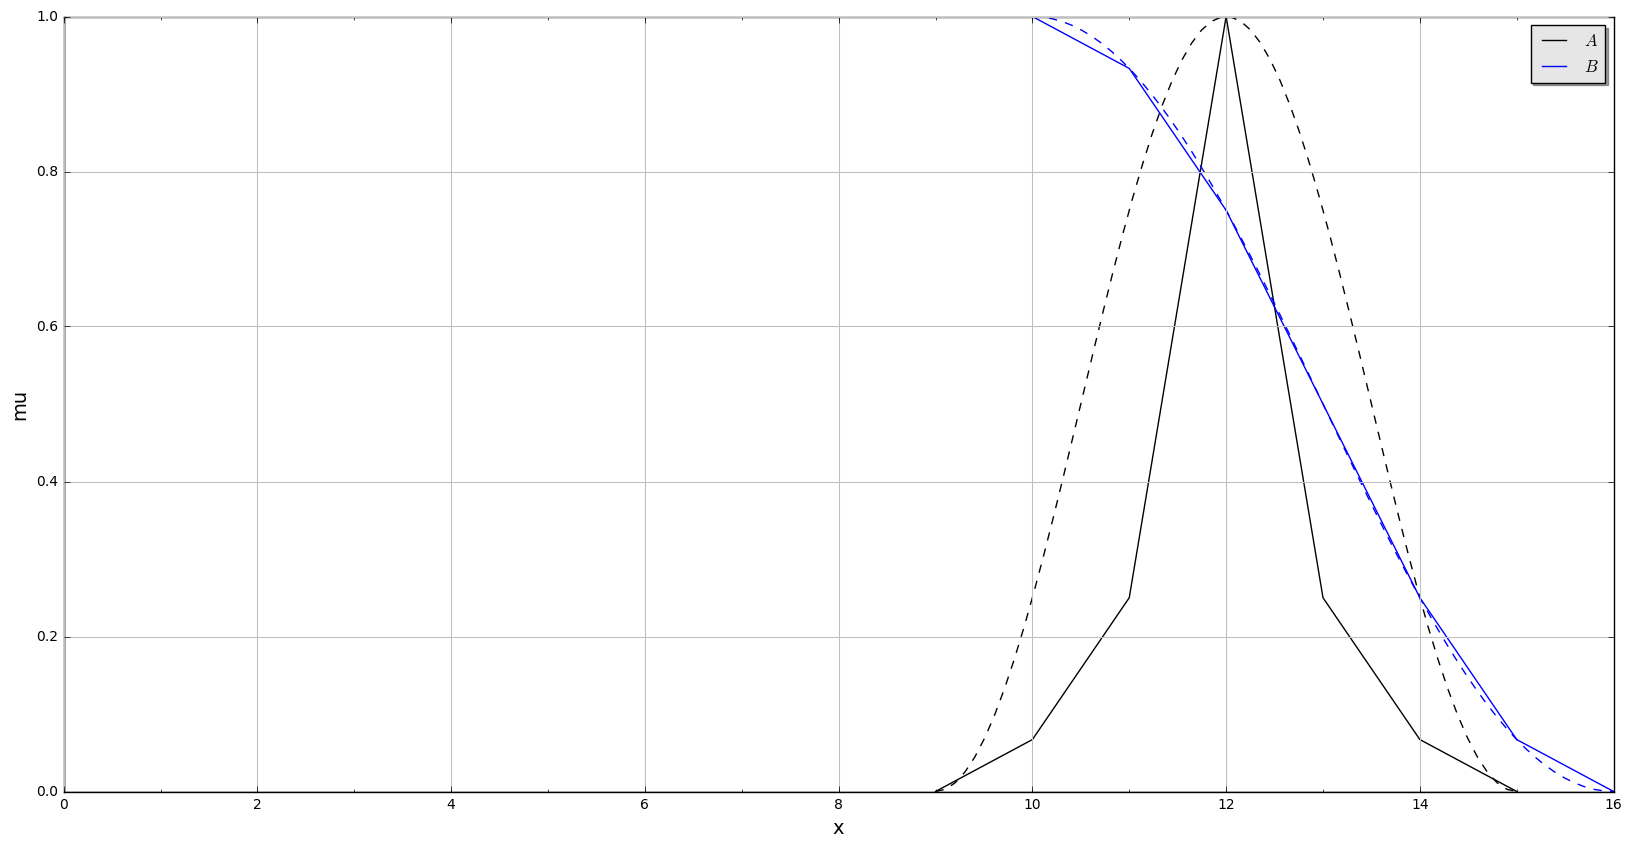

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = A.crds()
ax.plot(fst[0], fst[1], '-k',label = '$A$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = B.crds()
ax.plot(fst[0], fst[1], '-b',label = '$B$')
ax.plot(snd[0], snd[1], '--b')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

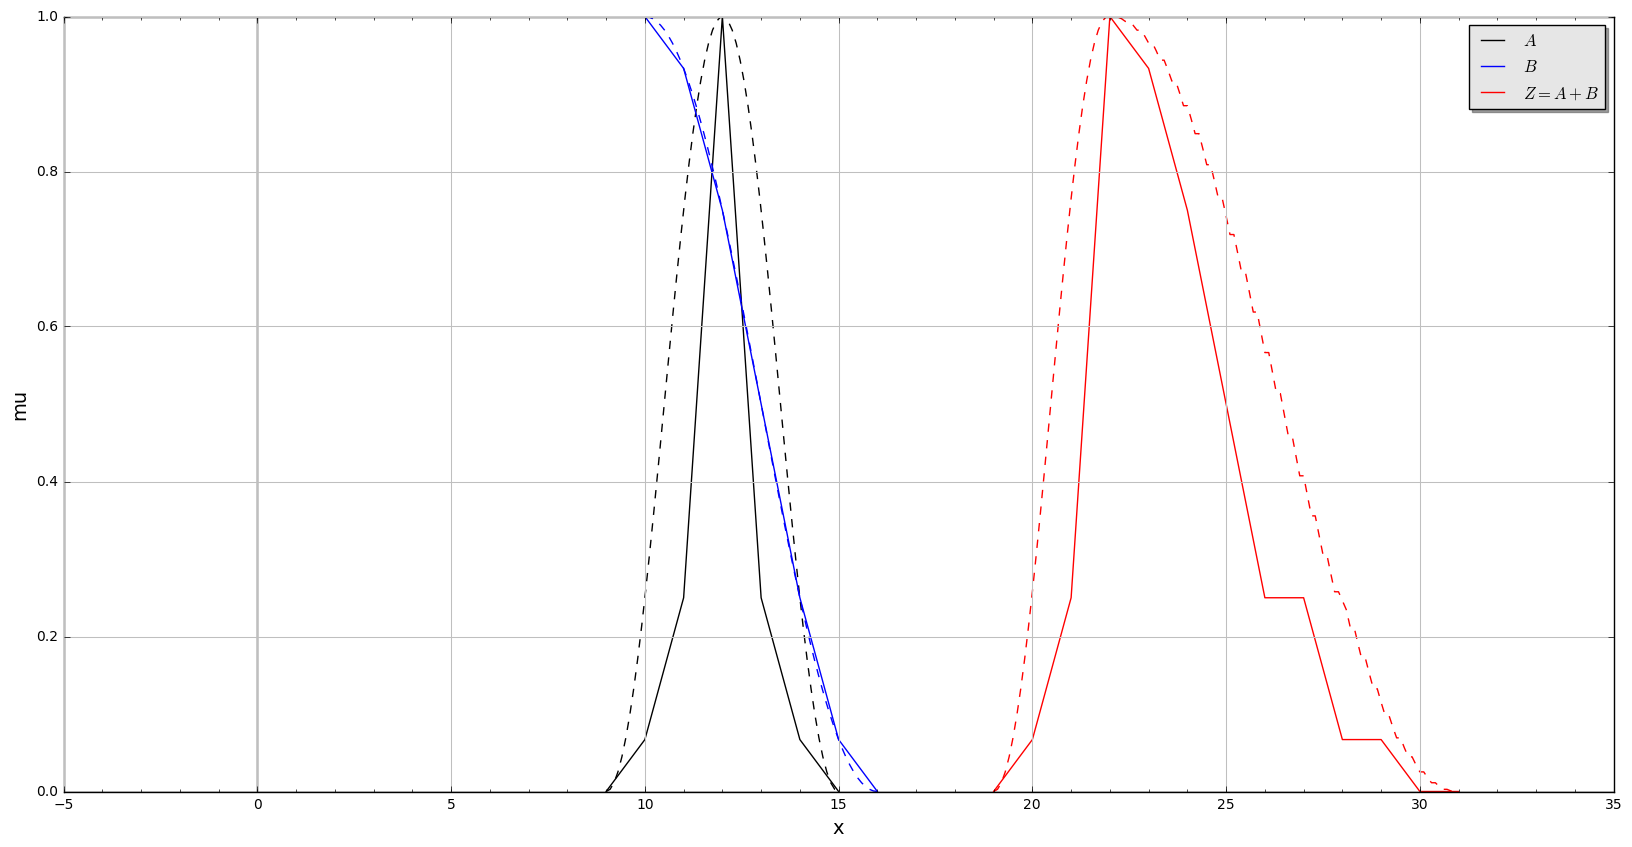

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = A.crds()
ax.plot(fst[0], fst[1], '-k',label = '$A$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = B.crds()
ax.plot(fst[0], fst[1], '-b',label = '$B$')
ax.plot(snd[0], snd[1], '--b')

Z = A + B
fst, snd = Z.crds()
ax.plot(fst[0], fst[1], '-r',label = '$Z = A + B$')
ax.plot(snd[0], snd[1], '--r')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

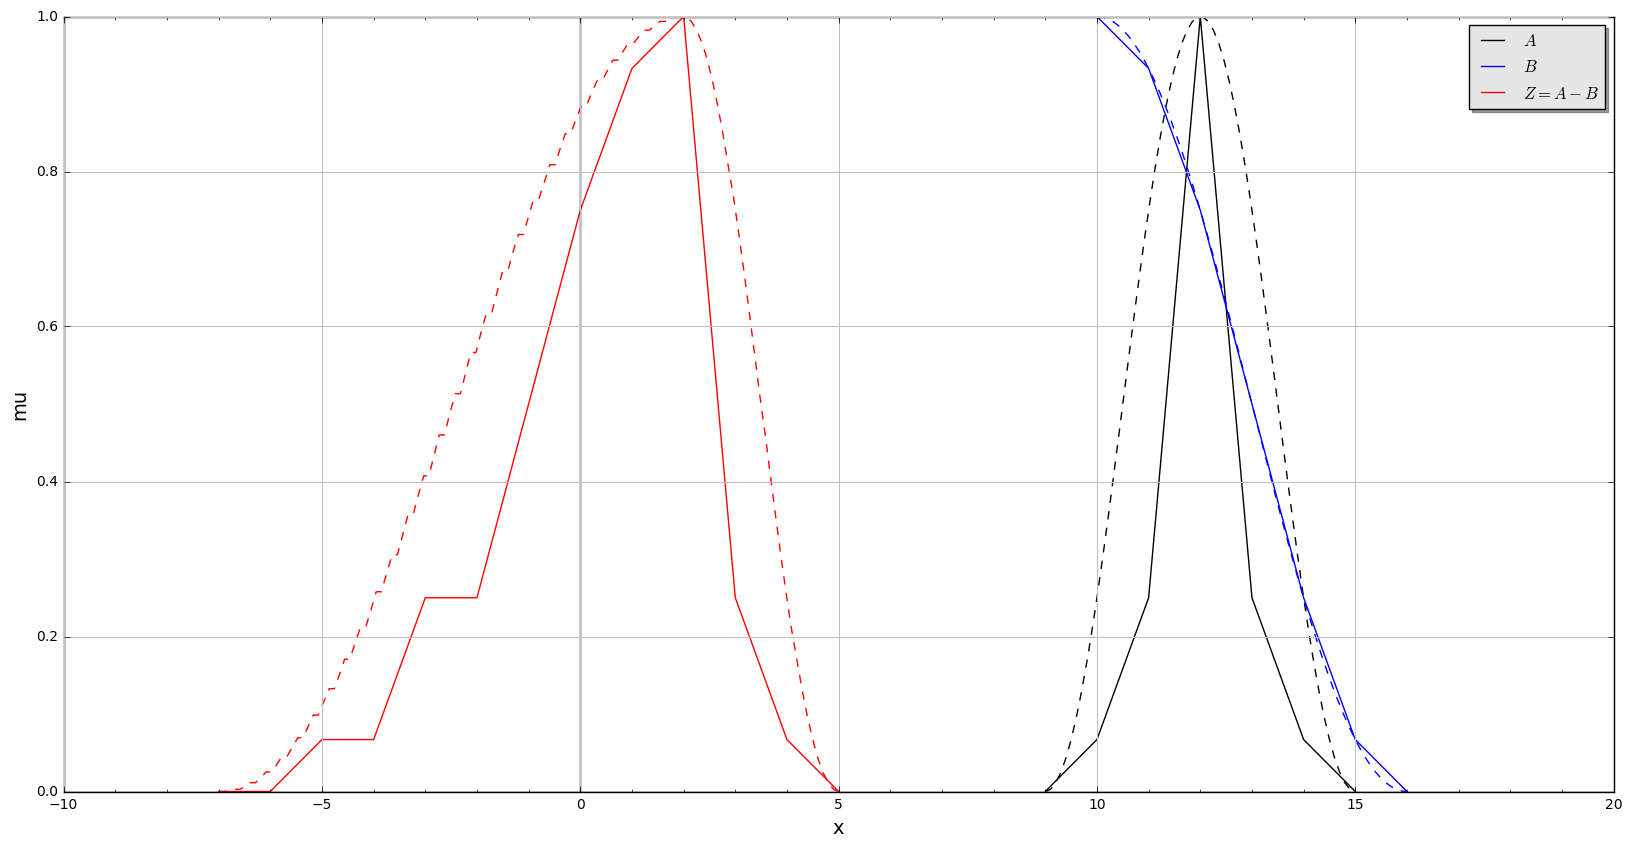

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = A.crds()
ax.plot(fst[0], fst[1], '-k',label = '$A$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = B.crds()
ax.plot(fst[0], fst[1], '-b',label = '$B$')
ax.plot(snd[0], snd[1], '--b')

Z = A - B
fst, snd = Z.crds()
ax.plot(fst[0], fst[1], '-r',label = '$Z = A - B $')
ax.plot(snd[0], snd[1], '--r')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

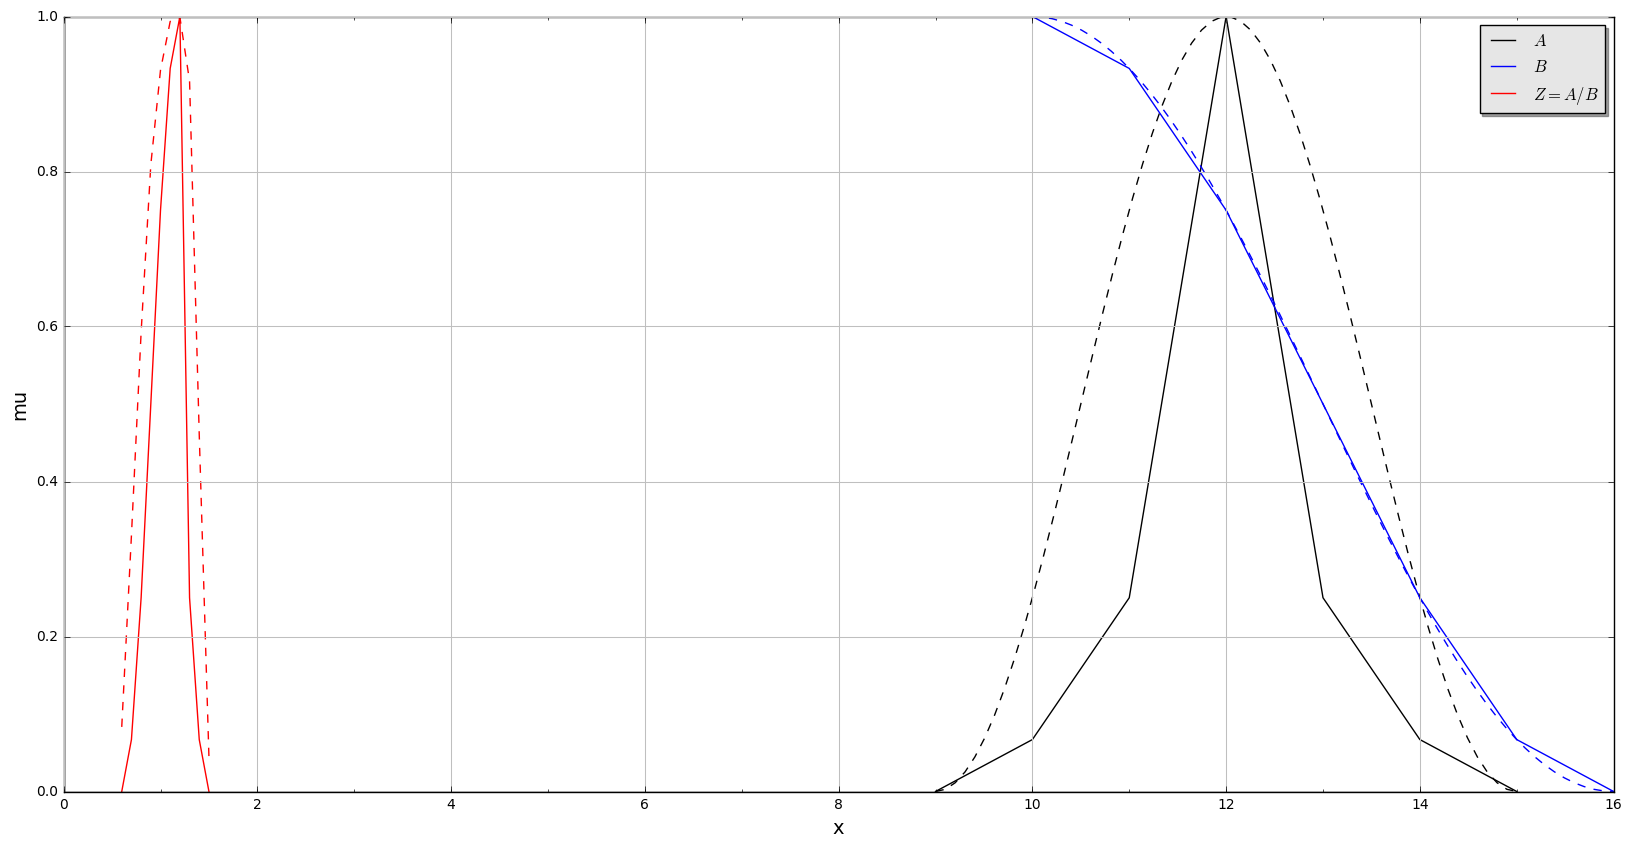

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = A.crds()
ax.plot(fst[0], fst[1], '-k',label = '$A$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = B.crds()
ax.plot(fst[0], fst[1], '-b',label = '$B$')
ax.plot(snd[0], snd[1], '--b')

Z = A / B
fst, snd = Z.crds()
ax.plot(fst[0], fst[1], '-r',label = '$Z = A / B$')
ax.plot(snd[0], snd[1], '--r')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

self: {(9, 0.0), (12, 1), (15, 0.0), (11, 0.25), (14, 0.067), (10, 0.067), (13, 0.25)}
other: {(12, 0.75), (15, 0.067), (11, 0.933), (16, 0.0), (14, 0.25), (10, 1), (13, 0.5)}
{192: 0, 224: 0, 130: 0, 195: 0, 132: 0, 135: 0, 140: 0, 143: 0, 144: 0, 210: 0, 150: 0, 196: 0, 90: 0, 156: 0, 154: 0, 160: 0, 208: 0, 99: 0, 100: 0, 165: 0, 168: 0, 169: 0, 225: 0, 108: 0, 240: 0, 110: 0, 176: 0, 180: 0, 117: 0, 182: 0, 120: 0, 121: 0, 126: 0}
i: 9
j: 10
rounded: 90
new_dict[rounded]: 0
self_dict.get(i, 1): 0.0
other_dict.get(j, 1): 1
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.0
i: 9
j: 11
rounded: 99
new_dict[rounded]: 0
self_dict.get(i, 1): 0.0
other_dict.get(j, 1): 0.933
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.0
i: 9
j: 12
rounded: 108
new_dict[rounded]: 0
self_dict.get(i, 1): 0.0
other_dict.get(j, 1): 0.75
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.0
i: 9
j: 13
rounded: 117
new_dict[rounded]: 0
self_dict.get(i, 1): 0.0
other_dict.get(j, 1): 0.5
min(self_dict.get(i, 1

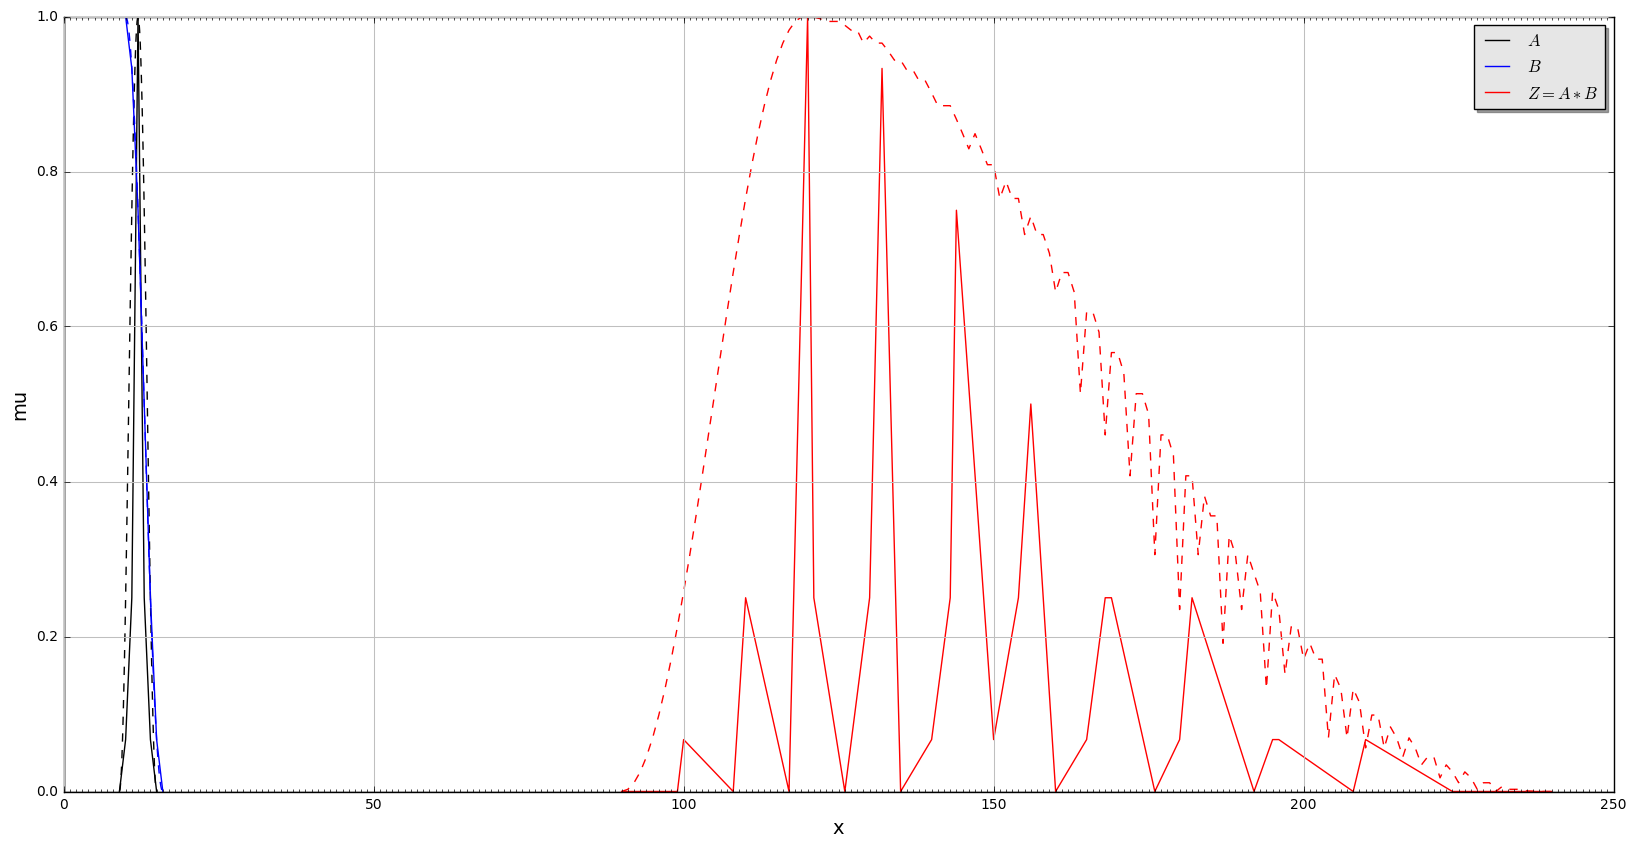

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = A.crds()
ax.plot(fst[0], fst[1], '-k',label = '$A$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = B.crds()
ax.plot(fst[0], fst[1], '-b',label = '$B$')
ax.plot(snd[0], snd[1], '--b')

Z = A * B
fst, snd = Z.crds()
ax.plot(fst[0], fst[1], '-r',label = '$Z = A * B $')
ax.plot(snd[0], snd[1], '--r')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

# Задание 2.
Даны следующие нечеткие числа:
$$$$
$ a = $ "В городе Магнитогорске проезд на трамвае стоит 15 рублей."
$$$$
$ b = $ "В городе Магнитогорске проезд на маршрутном автобусе стоит 18 рублей."
$$$$
$ c = $ "Надо проехать на трамвае раз 5."
$$$$
$ d = $ "Надо проехать на маршрутном автобусе по крайней мере раза 3."
$$$$
$$$$
Требуется выполнить следующее:
$$$$
1.) Записать нечеткие числа 
$$$$
2.) Найти $ x = $ "Примерная сумма расходов на транспорт в городе."
$$$$
3.) Построить графики функций принадлежности всех чисел

self: {(17, 0.0), (16, 0.146), (14, 0.146), (13, 0.0), (15, 1)}
other: {(3, 0.0), (5, 1), (7, 0.0), (6, 0.146), (4, 0.146)}
{64: 0, 65: 0, 68: 0, 70: 0, 75: 0, 78: 0, 80: 0, 84: 0, 85: 0, 90: 0, 91: 0, 96: 0, 48: 0, 98: 0, 102: 0, 39: 0, 105: 0, 42: 0, 45: 0, 112: 0, 51: 0, 52: 0, 119: 0, 56: 0, 60: 0}
i: 16
j: 3
rounded: 48
new_dict[rounded]: 0
self_dict.get(i, 1): 0.146
other_dict.get(j, 1): 0.0
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.0
i: 16
j: 4
rounded: 64
new_dict[rounded]: 0
self_dict.get(i, 1): 0.146
other_dict.get(j, 1): 0.146
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.146
i: 16
j: 5
rounded: 80
new_dict[rounded]: 0
self_dict.get(i, 1): 0.146
other_dict.get(j, 1): 1
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.146
i: 16
j: 6
rounded: 96
new_dict[rounded]: 0
self_dict.get(i, 1): 0.146
other_dict.get(j, 1): 0.146
min(self_dict.get(i, 1), other_dict.get(j, 1)): 0.146
i: 16
j: 7
rounded: 112
new_dict[rounded]: 0
self_dict.get(i, 1): 0.146
other_dict.get(j, 1)

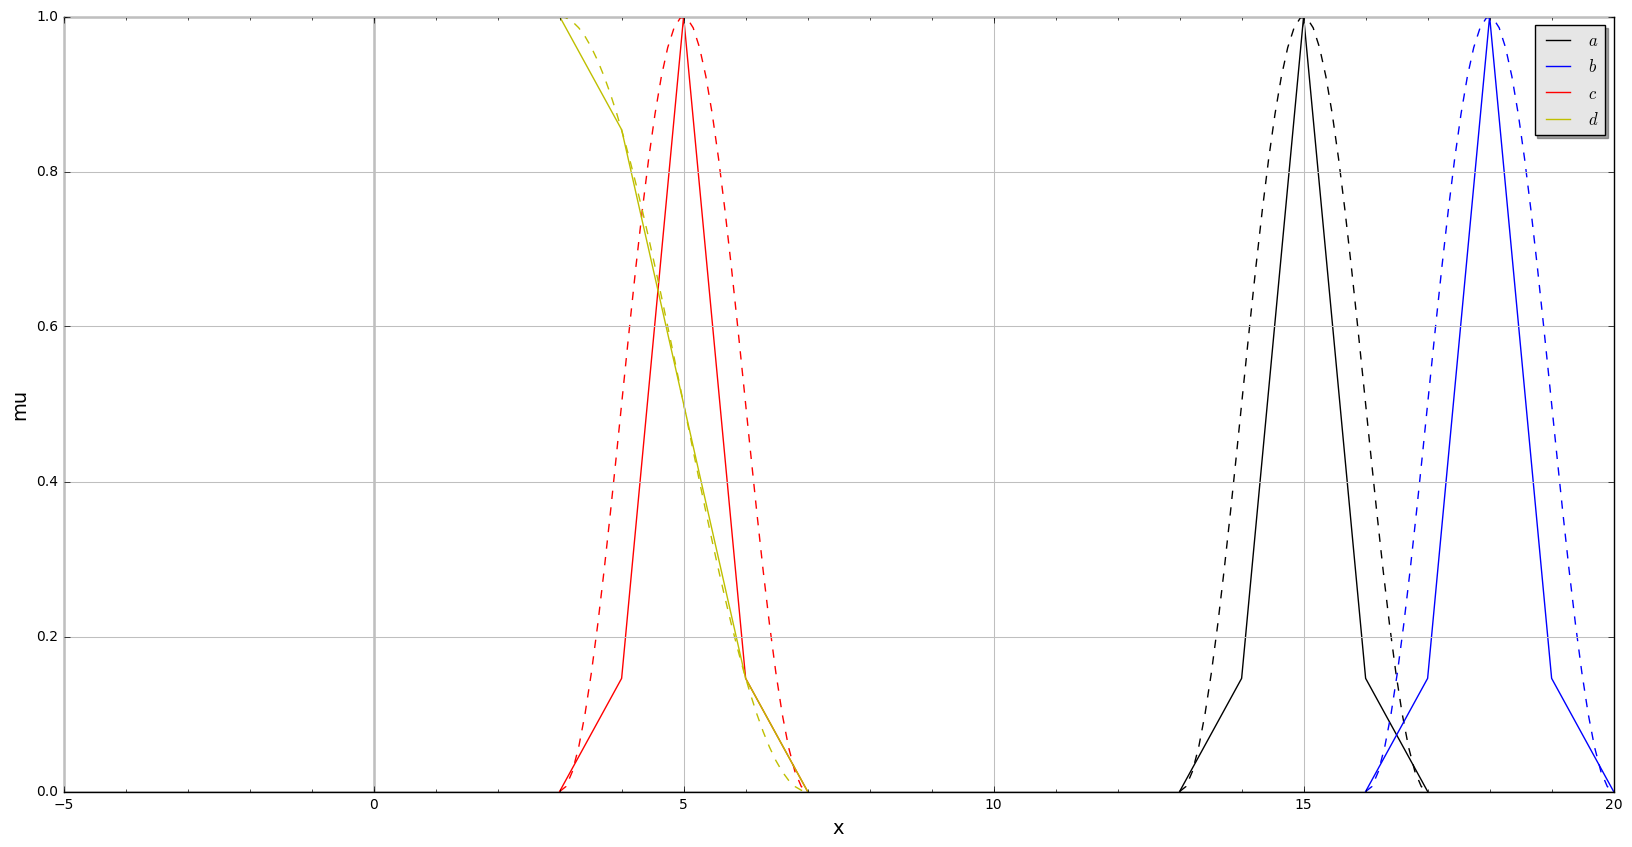

In [11]:
a = FuzzyNumber('around', 15, 2)
b = FuzzyNumber('around', 18, 2)
c = FuzzyNumber('around', 5, 2)
d = FuzzyNumber('more than', 3, 2)

x = a * c + b * d

fig, ax = plt.subplots(figsize=(20,10))

fst, snd = a.crds()
ax.plot(fst[0], fst[1], '-k',label = '$a$')
ax.plot(snd[0], snd[1], '--k')

fst, snd = b.crds()
ax.plot(fst[0], fst[1], '-b',label = '$b$')
ax.plot(snd[0], snd[1], '--b')

fst, snd = c.crds()
ax.plot(fst[0], fst[1], '-r',label = '$c$')
ax.plot(snd[0], snd[1], '--r')

fst, snd = d.crds()
ax.plot(fst[0], fst[1], '-y',label = '$d$')
ax.plot(snd[0], snd[1], '--y')

#fst, snd = x.crds()
#ax.plot(fst[0], fst[1], '-k',label = '$x = a * c + b * d $')
#ax.plot(snd[0], snd[1], '--k')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')


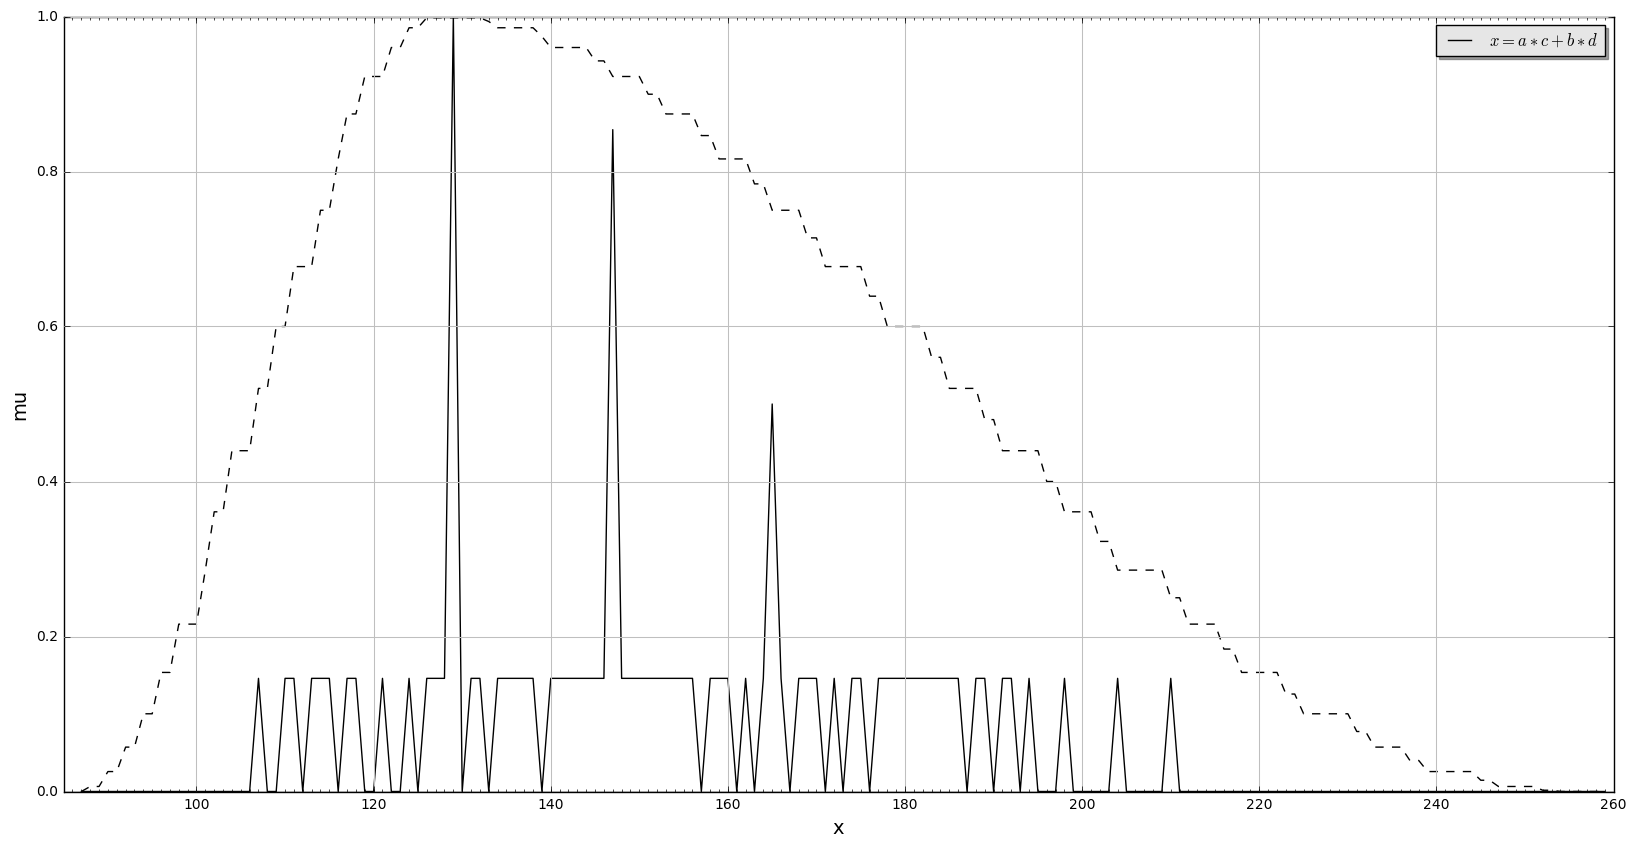

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

fst, snd = x.crds()
ax.plot(fst[0], fst[1], '-k',label = '$x = a * c + b * d $')
ax.plot(snd[0], snd[1], '--k')

plt.xlabel('x', fontsize = 14)
plt.ylabel('mu', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

plt.xlim(85)

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')